<a href="https://colab.research.google.com/github/algharak/semi-demand-fcst/blob/master/Copy_of_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
!pip install mxnet
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path


In [ ]:
mx.random.seed(0)
np.random.seed(0)

In [ ]:
!pip install gluonts

In [ ]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
print(f"Available datasets: {list(dataset_recipes.keys())}")

In [ ]:
dataset = get_dataset("m4_monthly", regenerate=True)

In [ ]:
train_entry = next(iter(dataset.train))
#train_entry = next(iter(dataset.train))
aa = train_entry
print (aa['item_id'])
print(train_entry.keys())


In [ ]:
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)


In [ ]:
print (type(dataset.metadata))
print (dataset.metadata)


In [ ]:
me=iter(dataset.train)
j = 1
for i in me:
  mef = to_pandas(i)
  print (j)
  print (mef.shape)
  j +=1
print ('i am donr')



In [ ]:

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Historical Product Demand Short.csv to Historical Product Demand Short (1).csv


In [ ]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['Historical Product Demand Short.csv']),parse_dates=["Date"])
df2.head

<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>

In [ ]:
df2.shape

(315924, 5)

In [ ]:
colnames = df2.columns.to_list()
print(type(colnames))
for i in colnames:
  print (i)

<class 'list'>
Product_Code
Warehouse
Product_Category
Date
Order_Demand


In [ ]:
#print (pd.unique(df2['Product_Category']))
prod_categ = list(pd.unique(df2['Product_Category']))
print(type(prod_categ))
print(prod_categ)

<class 'list'>
['Category_006', 'Category_003', 'Category_019', 'Category_001', 'Category_023', 'Category_011', 'Category_007', 'Category_028', 'Category_009', 'Category_021', 'Category_004', 'Category_015', 'Category_024', 'Category_030', 'Category_026', 'Category_018', 'Category_032', 'Category_020', 'Category_013', 'Category_005', 'Category_022', 'Category_031', 'Category_010', 'Category_033', 'Category_017', 'Category_008', 'Category_029', 'Category_025', 'Category_012', 'Category_014', 'Category_002']


In [ ]:
print (df2.head)
print (df2.info())

<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315924 entries, 

In [ ]:
start_date = df2['Date'].min()
end_date = df2['Date'].max()
print (start_date,end_date)
print (type(start_date),type(end_date))

2011-01-08 00:00:00 2013-07-12 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
idx = pd.date_range(start=start_date, end=end_date)

In [ ]:
dtdelta = end_date-start_date
nrows = dtdelta.days
print (type(nrows))
ncols = len (prod_categ)
print(nrows,ncols)

<class 'int'>
916 31


In [ ]:
dfnew = pd.DataFrame(np.zeros((nrows+1,ncols),dtype=int),index=idx, columns=prod_categ)
dfnew.head

<bound method NDFrame.head of             Category_006  Category_003  ...  Category_014  Category_002
2011-01-08             0             0  ...             0             0
2011-01-09             0             0  ...             0             0
2011-01-10             0             0  ...             0             0
2011-01-11             0             0  ...             0             0
2011-01-12             0             0  ...             0             0
...                  ...           ...  ...           ...           ...
2013-07-08             0             0  ...             0             0
2013-07-09             0             0  ...             0             0
2013-07-10             0             0  ...             0             0
2013-07-11             0             0  ...             0             0
2013-07-12             0             0  ...             0             0

[917 rows x 31 columns]>

In [ ]:
import datetime
cat_idx = colnames.index('Product_Category')
dt_idx = colnames.index('Date')
value_idx = colnames.index('Order_Demand')
print(cat_idx)
df2.info()

2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315924 entries, 0 to 315923
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_Code      315924 non-null  object        
 1   Warehouse         315924 non-null  object        
 2   Product_Category  315924 non-null  object        
 3   Date              315924 non-null  datetime64[ns]
 4   Order_Demand      315924 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.1+ MB


In [ ]:
print (dfnew.head)
print (type(dfnew.index[1]))

<bound method NDFrame.head of             Category_006  Category_003  ...  Category_014  Category_002
2011-01-08             0             0  ...             0             0
2011-01-09             0             0  ...             0             0
2011-01-10             0             0  ...             0             0
2011-01-11             0             0  ...             0             0
2011-01-12             0             0  ...             0             0
...                  ...           ...  ...           ...           ...
2013-07-08             0             0  ...             0             0
2013-07-09             0             0  ...             0             0
2013-07-10             0             0  ...             0             0
2013-07-11             0             0  ...             0             0
2013-07-12             0             0  ...             0             0

[917 rows x 31 columns]>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
from tqdm.notebook import tqdm
nr = df2.shape[0]
rng = list(range(nr))
print(nr)
for n in tqdm(rng):
  #df2['Date'] = pd.to_datetime(df2['Date']).dt.date
  #act_date = datetime.datetime.strptime(df2.iloc[n,dt_idx], '%Y-%m-%d').date()
  act_date = df2.iloc[n,dt_idx]
  #print(act_date)
  act_cat = df2.iloc[n,cat_idx]
  #print(act_cat)
  act_value = int(df2.iloc[n,value_idx])
  #print(act_value)
  #print (n)
  #print(dfnew.loc[act_date,act_cat])
  dfnew.loc[act_date,act_cat] += act_value
  #print(dfnew.loc[act_date,act_cat])
print('i am done')

315924



i am done


In [ ]:
print (dfnew.values.sum())

1468366931


In [ ]:
print (df2.head)


<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>


In [ ]:
print (df2['Order_Demand'].values.sum())


In [ ]:
dfnew['inx']=dfnew.index
print(dfnew.head)

<bound method NDFrame.head of             Category_006  Category_003  ...  Category_002        inx
2011-01-08             2             0  ...             0 2011-01-08
2011-01-09             0             0  ...             0 2011-01-09
2011-01-10             0             0  ...             0 2011-01-10
2011-01-11             0             0  ...             0 2011-01-11
2011-01-12             0             0  ...             0 2011-01-12
...                  ...           ...  ...           ...        ...
2013-07-08        803601           588  ...             0 2013-07-08
2013-07-09        196212           189  ...             0 2013-07-09
2013-07-10        163503           136  ...             0 2013-07-10
2013-07-11        221811             3  ...             0 2013-07-11
2013-07-12        363108           129  ...             0 2013-07-12

[917 rows x 32 columns]>


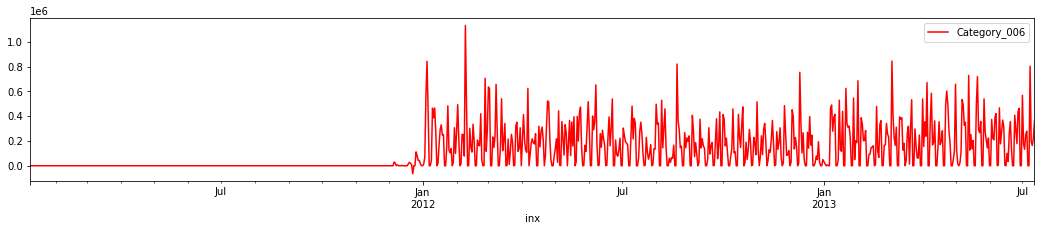

In [ ]:
import matplotlib.pyplot as plt

dfnew.plot(kind='line',x='inx',y='Category_006',color='red',figsize=(18,3))
plt.show()